In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df = pd.read_csv("/Users/sa10/Downloads/Financial Fraud Detection TLAB/Financial-Fraud-Detection/data/new_data.csv")

In [4]:
x = df.drop(columns=["isFraud"])
y = df["isFraud"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression Modeling

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# train the logistic regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(x_train_scaled, y_train)

# predict on the test set
predlog = logreg.predict(x_test_scaled)

# evaluate the model
print(accuracy_score(y_test, predlog))
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test, predlog))


0.9991819407728263
[[1270852      52]
 [    989     631]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.39      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



In [12]:
model = LogisticRegression(multi_class="ovr", class_weight="balanced")
# fit the model
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr')

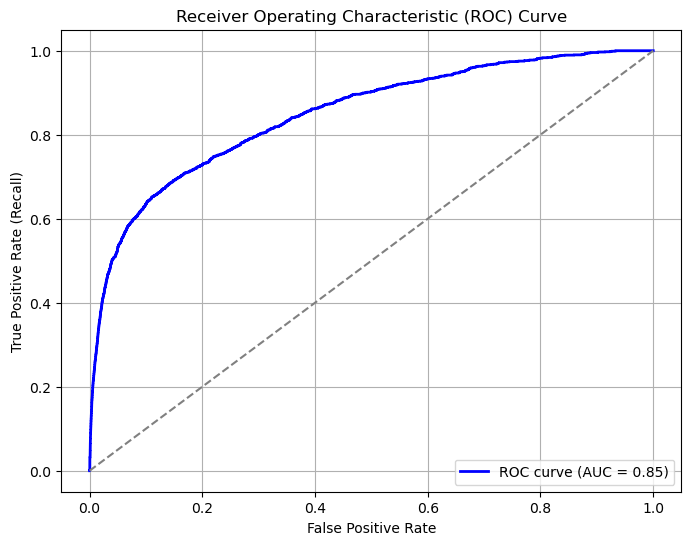

In [19]:
# predicted probabilities
y_pred_prob = model.predict_proba(x_test)[:, 1]

# compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# compute AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The model achieves a high overall accuracy of 99.92%, but its performance is skewed due to an imbalanced dataset. While it can identify non-fraudulent transactions (100% precision and recall), its ability to detect fraudulent transactions is much worse, with only 39% recall and 92% precision. The F1-score for fraud detection is 0.55, indicating room for improvement. The high accuracy is mainly because of the model’s performance on the non-fraud transactions, but it misses many fraud cases.

An AUC of 0.85 means the model does a good job of telling apart the two classes, correctly identifying positives most of the time while keeping false positives low across different settings.

# kNN Modeling

In [7]:
# hyperparameter tuning for kNN
paramgrid = {'n_neighbors': [3, 5, 7, 9]} # values to test
gridknn = GridSearchCV(KNeighborsClassifier(), paramgrid, cv=5, scoring='f1') 
gridknn.fit(x_train, y_train)

# train
knn = KNeighborsClassifier(n_neighbors=gridknn.best_params_['n_neighbors'])
knn.fit(x_train, y_train)

# predict
ypredknn = knn.predict(x_test)
# evaluate
print(accuracy_score(y_test, ypredknn))
print(confusion_matrix(y_test, ypredknn))
print(classification_report(y_test, ypredknn))

0.9992825282666574
[[1270865      39]
 [    874     746]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.46      0.62      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.73      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



The model has a accuracy of 99.93%, but it still struggles with detecting fraud. It performs perfectly with non-fraudulent transactions, achieving 100% precision and recall. However, for fraudulent transactions, it only detects 46% of fraud cases (low recall), meaning it misses about half of them. When it predicts fraud, it’s correct 95% of the time (high precision). The F1 score for fraud detection is 0.62, which shows some improvement, but there’s still room to make fraud detection better.

# Naive Bayes Modeling

In [9]:
# train the naive bayes model
nb = GaussianNB()
nb.fit(x_train, y_train)
# predict
yprednb = nb.predict(x_test)
# evaluate
print(accuracy_score(y_test, yprednb))
print(confusion_matrix(y_test, yprednb))
print(classification_report(y_test, yprednb))

0.9987269395311994
[[1270904       0]
 [   1620       0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.00      0.00      0.00      1620

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The model has a accuracy of 99.87%, but this number is misleading because it completely misses all fraudulent transactions. While it correctly classifies all non-fraudulent transactions, recall, and F1-score, it fails to identify any fraud. The recall and precision for fraud are both 0%, resulting in an F1-score of 0.00 for fraud detection. This shows that despite the high accuracy because of the non-fraudulent transactions, the model is ineffective at detecting fraud.